## Task 2
### In this task you will work with data collected from our wheeled robot , check How_data_collected_for_Task_2.ipynb for more info.
### You have 7 txt files (0.txt to 6.txt) each represent a step
### build a map of the robot at each step independently using the code provided in Task 1 ( taken from http://ais.informatik.uni-freiburg.de/teaching/ss20/robotics/)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import csv

#arr[]=np.array()

In [18]:
for i in range(7):### loop opens each file and prints number of measurments
    
    with open(str(i)+'.txt') as f:
        line_1 = f.readline()
        line_as_list=line_1.split('\t')
        arr = np.array(line_as_list)
        print(len(arr))
    f.close()
##### print  

99
73
107
66
122
99
56


In [19]:

## oppen one file and review data in array arr
with open(str(i)+'.txt') as f:
    line_1 = f.readline()
    line_as_list=line_1.split('\t')
    arr = np.array(line_as_list)
    print(len(arr))
    print(arr[0])# 
f.close()


56
(15, 280.296875, 1203.0)


###  What does (15, 280.296875, 1203.0) mean (check https://rplidar.readthedocs.io/en/latest/ for more info)
#### First value (mostly 15 ) is  quality : int which is  Reflected laser pulse strength

#### Second value is  angle : float which is the measurment heading angle in degree unit [0, 360)

#### Third value is  distance : float Measured object distance related to the sensor’s rotation center. In millimeter unit. Set to 0 when measurment is invalid.

In [20]:
## Here comes your code 
## generate occupancy gird map from each step

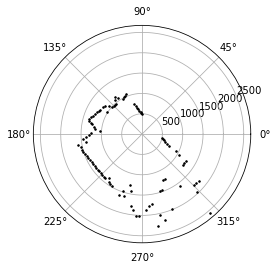

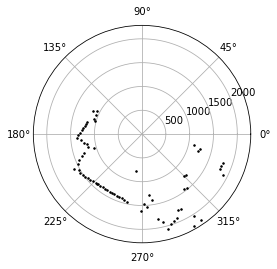

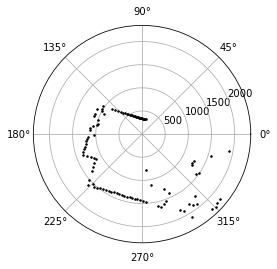

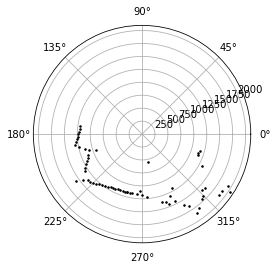

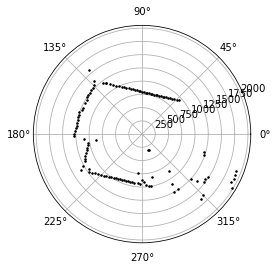

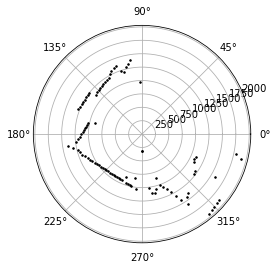

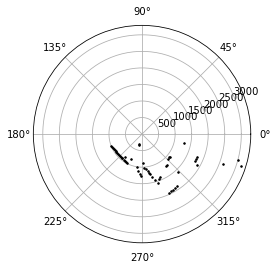

In [21]:
for i in range(7):
    plt.clf()
    data = csv.DictReader(open(f'{i}.csv'))
    for row in data:
        plt.polar(float(row['angle']) * pi/180.0, float(row['distance']), '.k', markersize=3)
        # plt.polar(row['angle'], row['distance'], '.k', markersize=3)

    plt.gca().set_aspect('equal')
    plt.show()

        